In [ ]:
'''Problem Statement: You need to predict the happiness score considering all the other factors mentioned in the 
dataset. '''

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [159]:
happy = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
happy.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Labels :
- Country : Name of the country.
- Region : Region the country belongs to.
- Happiness Rank : Rank of the country based on the Happiness Score.
- Standard Error : The standard error of the happiness score.
- Economy (GDP per Capita) : A a financial metric that breaks down a country's economic output per person.
- Family : Family contributes to Happiness Score.
- Health (Life Expectancy) : The expected number of remaining years of life spent in good health from a particular age.
- Freedom : The power or right to act, speak, or think as one wants.
- Trust (Government Corruption) : Trust on Government.
- Generosity : The quality of being kind and generous.
- Dystopia Residual : The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

## Target :
- Happiness Score : If we add all these labels, we will get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

In [80]:
happy.shape

(158, 12)

This is the shape of our dataset. (158,12)

In [81]:
happy.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [82]:
happy.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no null values present in our dataset.

In [83]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Information about dataset
- Range Index : 0 - 157
- 158 values in each coluns
- Non-nulls
- dtypes : float(9), int(1), object(2)

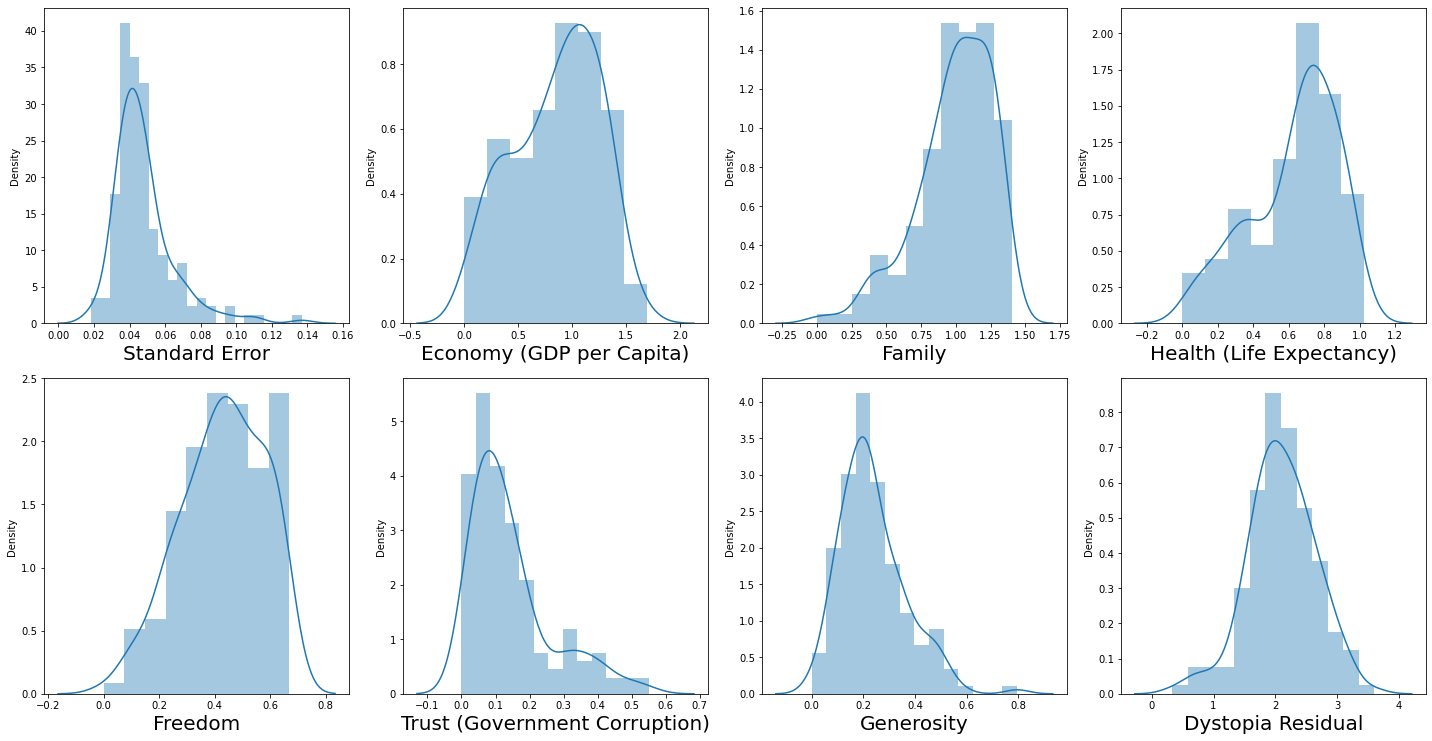

In [85]:
plt.figure(figsize = (20,15))
plotnumber = 1

for column in happy.drop(['Country','Region','Happiness Score','Happiness Rank'],axis =1):
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(happy[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

Plotting the distribution graph to see the normal distribution and dropping the unwanted columns.

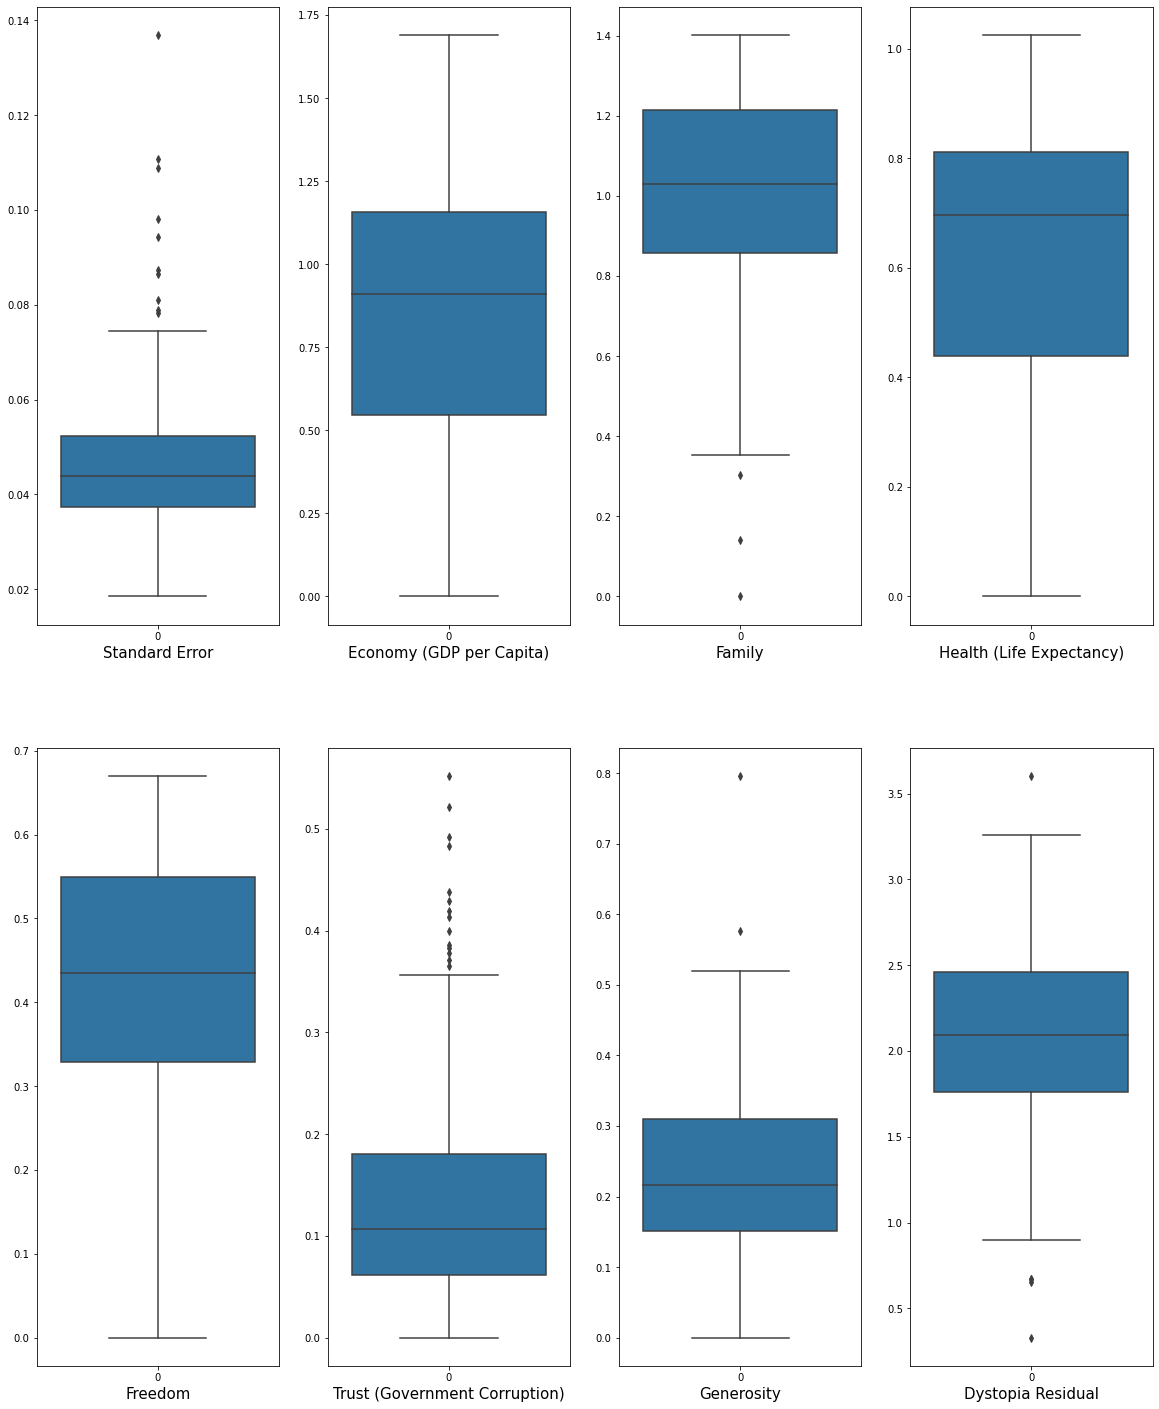

In [86]:
plt.figure(figsize = (20,25))
graph = 1
for column in happy.drop(['Country','Region','Happiness Score','Happiness Rank'],axis =1):
    if graph <= 8:
        plt.subplot(2,4,graph)
        ax = sns.boxplot(data = happy[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

Using boxplot to detect the skewness and outliers present in our dataset. And found the outliers in 
- Standard Error
- Family
- Trust (Government Corruption)
- Generosity 
- Dystopia Residual

In [87]:
skew = PowerTransformer(method = 'yeo-johnson')

To remove skewness and outliers, I used power Transformer and method is Yeo-Johnson, as it will work on negative as well as positive outliers on dataset.

In [88]:
happy[['Standard Error','Family','Trust (Government Corruption)','Generosity','Dystopia Residual']] = skew.fit_transform(happy[['Standard Error','Family','Trust (Government Corruption)','Generosity','Dystopia Residual']].values)

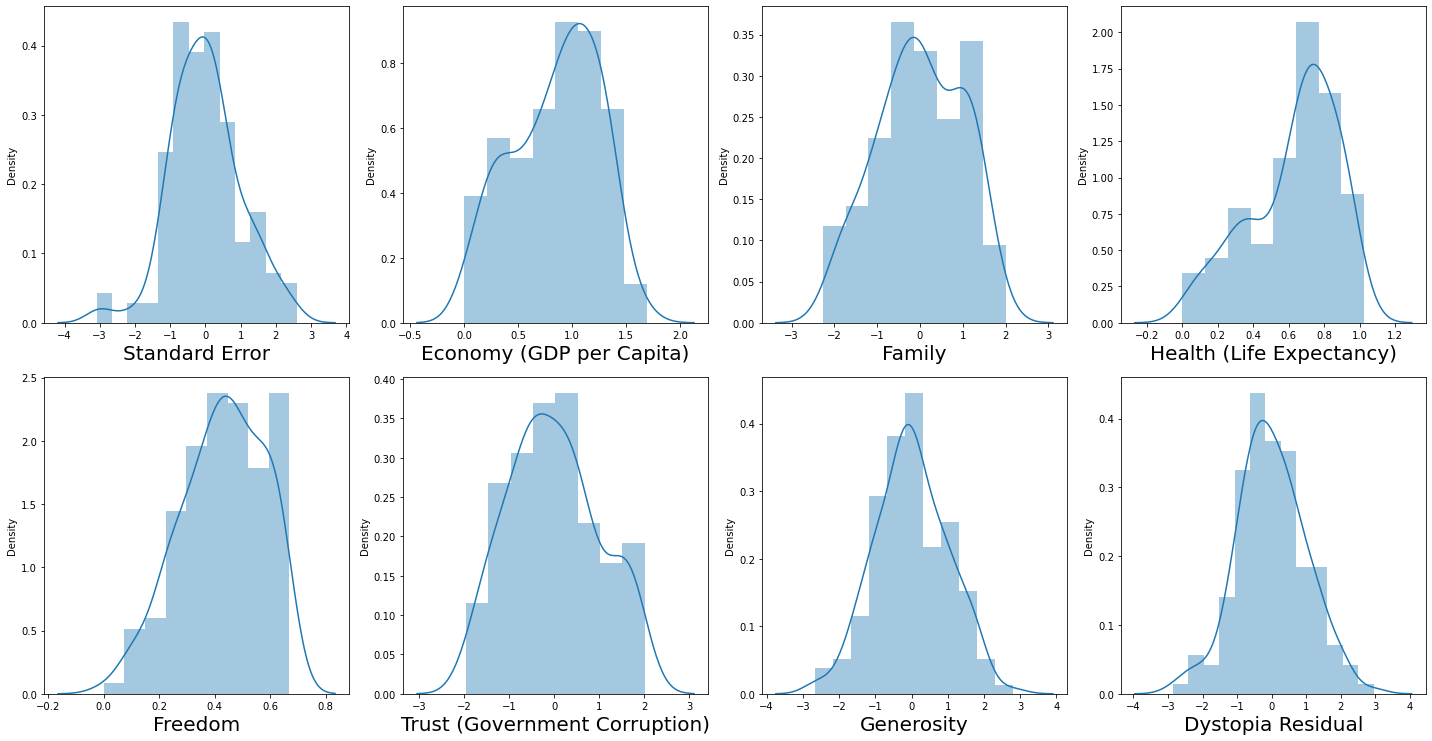

In [89]:
plt.figure(figsize = (20,15))
plotnumber = 1

for column in happy.drop(['Country','Region','Happiness Rank','Happiness Score','Happiness Rank'],axis =1):
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(happy[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

After applying Power Transformer, we can see that our dataset is very close to Normal Distribution.

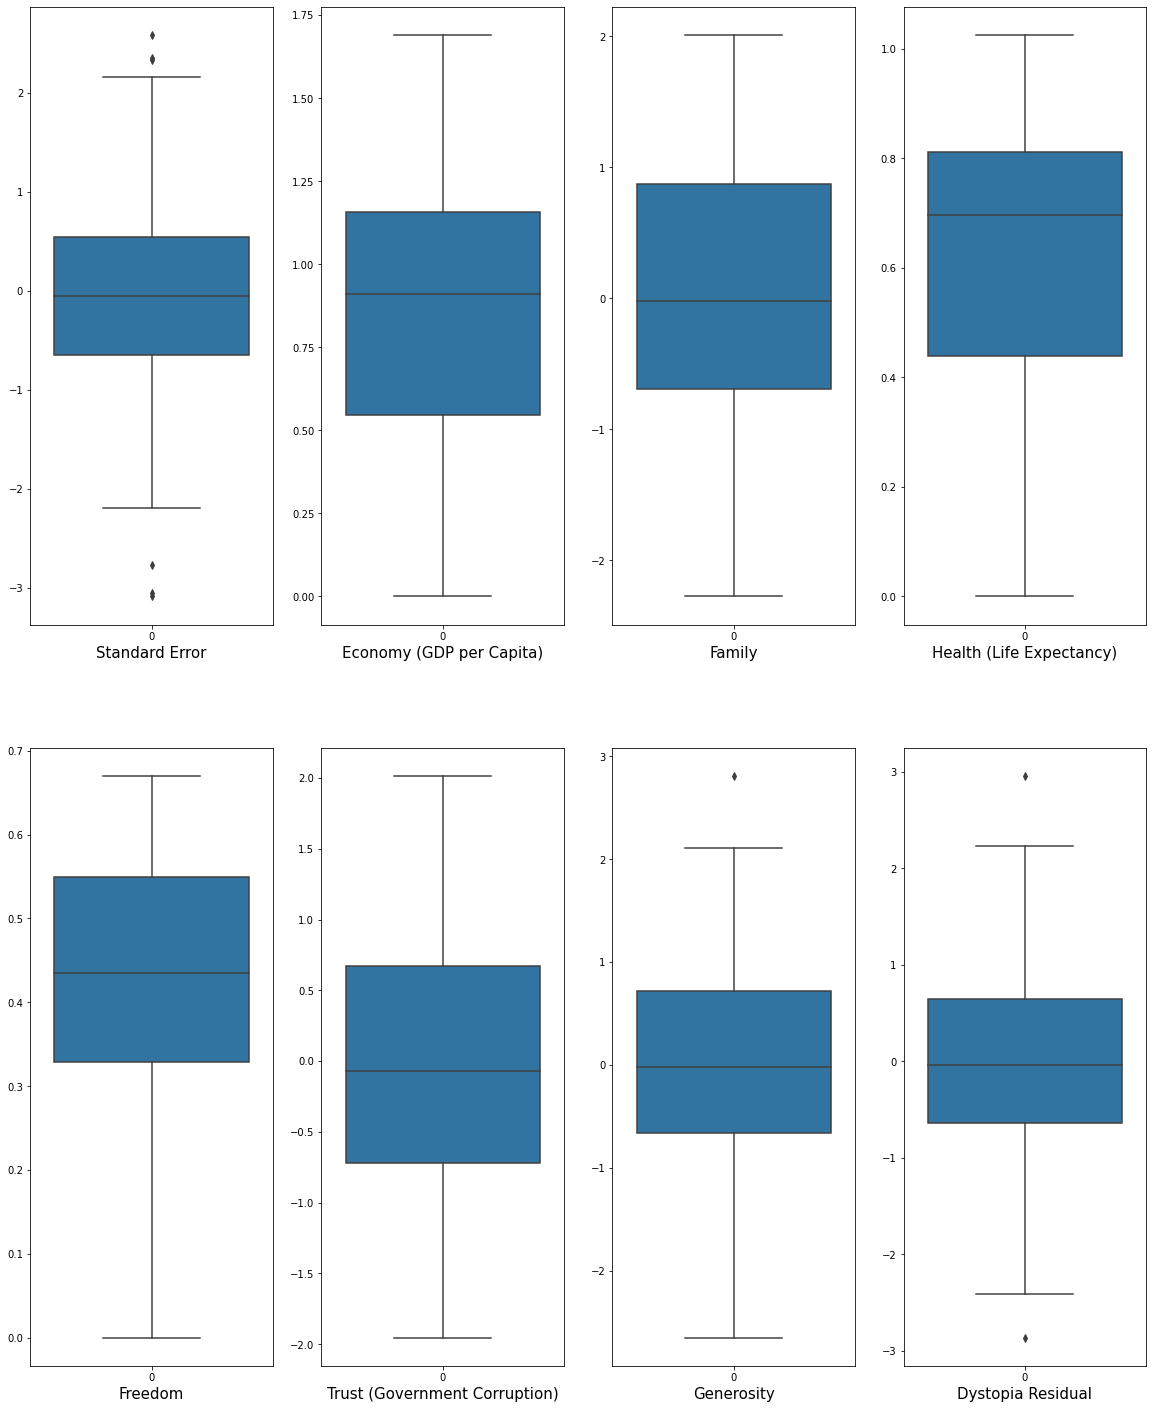

In [90]:
plt.figure(figsize = (20,25))
graph = 1
for column in happy.drop(['Country','Region','Happiness Rank','Happiness Score'],axis =1):
    if graph <= 8:
        plt.subplot(2,4,graph)
        ax = sns.boxplot(data = happy[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

And also the outliers has been removed from columns as we can see in the boxplot, very few are left. And we are good to proceed.

In [91]:
df_corr = happy.corr().abs()

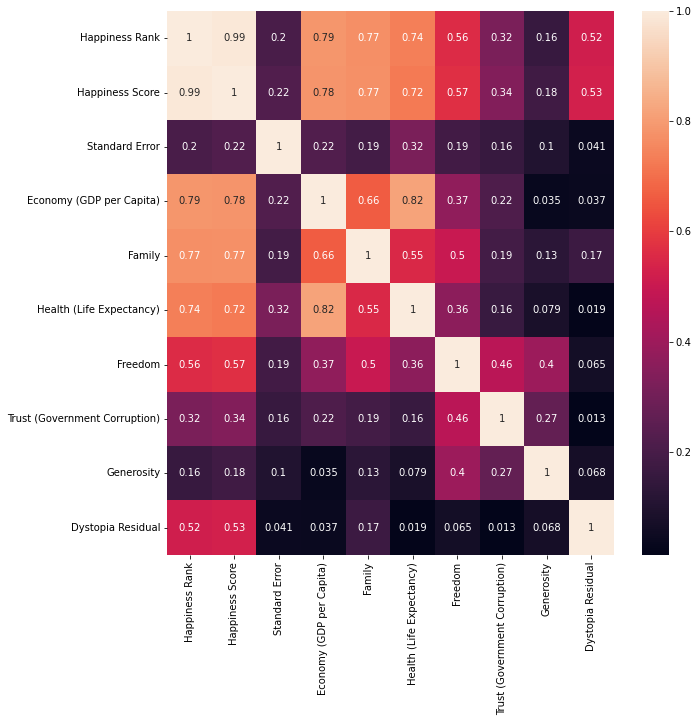

In [92]:
plt.figure(figsize = (10,10))
sns.heatmap(df_corr, annot = True)
plt.show()

Checking the multicolinearity using heatmap, And found that Health (Life Expectancy) and Economy (GDP per Capita) are some where colinear.

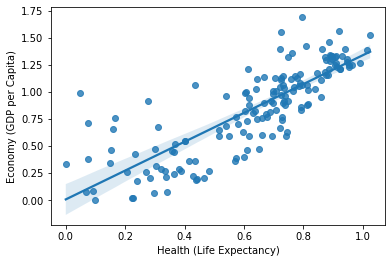

In [93]:
sns.regplot(happy['Health (Life Expectancy)'],happy['Economy (GDP per Capita)'])
plt.show()

checking the collinearity between Health (Life Expectancy) and Economy (GDP per Capita) but they are not linear, so we cannot drop any of the columns present.

In [135]:
x = happy.drop(columns = ['Country','Region','Happiness Score'],axis = 1)
x

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,-0.972226,1.39651,1.669206,0.94143,0.66557,1.773991,0.622391,0.750992
1,2,0.309350,1.30232,2.012132,0.94784,0.62877,0.315993,1.480995,1.110011
2,3,-1.062017,1.32548,1.739586,0.87464,0.64938,1.906792,0.927973,0.702275
3,4,-0.503610,1.45900,1.553118,0.88521,0.66973,1.624007,0.964080,0.651035
4,5,-0.823548,1.32629,1.501726,0.90563,0.63297,1.503484,1.592224,0.625118
...,...,...,...,...,...,...,...,...,...
153,154,-0.916014,0.22208,-0.959885,0.42864,0.59201,2.012856,0.065304,-2.393259
154,155,-0.719479,0.28665,-1.896644,0.31910,0.48450,-0.433835,-0.334169,-0.863565
155,156,0.399137,0.66320,-1.690664,0.72193,0.15684,0.738915,1.659336,-2.866216
156,157,1.926902,0.01530,-1.796803,0.22396,0.11850,-0.151946,-0.194829,-0.514801


Seperating the labels from target.

In [136]:
y = happy['Happiness Score']
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

Seperating the target from labels.

In [137]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.72099989, -0.9722262 ,  1.36962124, ...,  1.77399062,
         0.62239051,  0.75099154],
       [-1.69907456,  0.30934971,  1.13522625, ...,  0.31599325,
         1.48099498,  1.11001108],
       [-1.67714922, -1.06201663,  1.19286069, ...,  1.90679208,
         0.92797276,  0.70227525],
       ...,
       [ 1.67742676,  0.39913743, -0.45524543, ...,  0.7389146 ,
         1.65933595, -2.86621551],
       [ 1.69935209,  1.92690191, -2.06756644, ..., -0.15194624,
        -0.19482942, -0.51480137],
       [ 1.72127743,  1.31032295, -1.58633379, ..., -0.06732623,
        -0.49041465, -0.97664548]])

Using Standard Scaler to scale the value of dataset, So that our Model will not be bias and treat every single column equally. And the values will become unitless.

## Training the Model

**- Train Test Split**

In [138]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 60)

**- Creating The function for the training and testing score, so that, we can get the results just nby calling the function**

In [140]:
def score(reg, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = reg.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_train,y_pred))
    
    elif train == False:
        pred = reg.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_test,pred))

**- Model Instantiating**

In [150]:
#Instantiating different algorithms to see the difference.
svr = SVR()
ada = AdaBoostRegressor()
rf = RandomForestRegressor()

**- Model Trainning For SVM**

In [143]:
svr.fit(x_train,y_train)
score(svr, x_train,x_test,y_train,y_test,train = True)
score(svr, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.9889112822037952

 ----- Test Result ----- 

R2 Score: 0.9026119068543206


Score of SVR. 

**- Model Trainning For AdaBoost**

In [155]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.9973551603177873

 ----- Test Result ----- 

R2 Score: 0.9915078404075368


Score of AdaBoost.

**- Model Trainning For RandomForest**

In [151]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.9990049772535617

 ----- Test Result ----- 

R2 Score: 0.9907515039718805


Score of Random Forest

In [157]:
#print('Score : ', ada.predict(scaler.transform([[2, 0.309350, 1.30232, 2.012132, 0.94784, 0.62877, 0.315993, 1.480995, 1.110011]])))

Score :  [7.390875]


**So for this dataset the AdaBoost algorithm is best for out model, as adaboost gives the best training and testing score, So will choose the AdaBoostRegressor**